In [1]:
import numpy as np
import pandas as pd
# Import the necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
# This is the pipeline module we need for this from imblearn
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

In [2]:
train_df = pd.read_csv('/Users/halisyigin/Desktop/kusan_capstone/train_eda.csv')

In [3]:
train_df = pd.get_dummies(train_df, drop_first=True)

In [4]:
X = train_df.drop('isFraud', axis=1)
y = train_df['isFraud']

In [5]:
names=X.columns
scaler = StandardScaler()
train_sd = scaler.fit_transform(X)

In [6]:
X=pd.DataFrame(train_sd, columns=names)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Logistic Regression Plain

In [8]:
#logistic regression without SMOTE
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

<Figure size 432x288 with 0 Axes>

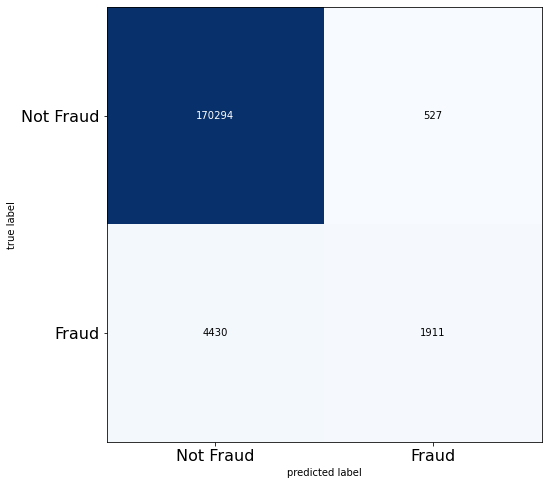

In [9]:
# Compute and print the confusion matrix
cm  = confusion_matrix(y_test, y_pred)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(2), ['Not Fraud', 'Fraud'], fontsize=16)
plt.yticks(range(2), ['Not Fraud', 'Fraud'], fontsize=16)
plt.show()

In [10]:
# Compute and print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99    170821
           1       0.78      0.30      0.44      6341

    accuracy                           0.97    177162
   macro avg       0.88      0.65      0.71    177162
weighted avg       0.97      0.97      0.97    177162



# Resampling

In [11]:
# SMOTE and RandomUnderSampler
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
X_train_new, y_train_new = pipeline.fit_resample(X_train, y_train)


In [12]:
def resample_model(model):
    ml_clf=model.fit(X_train_new, y_train_new)
    y_pred = ml_clf.predict(X_test)
    # Compute and print the confusion matrix and classification report
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    cm  = confusion_matrix(y_test, y_pred)
    plt.figure()
    plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Blues)
    plt.xticks(range(2), ['Not Fraud', 'Fraud'], fontsize=16)
    plt.yticks(range(2), ['Not Fraud', 'Fraud'], fontsize=16)
    plt.show()

[[158698  12123]
 [  2406   3935]]
              precision    recall  f1-score   support

           0       0.99      0.93      0.96    170821
           1       0.25      0.62      0.35      6341

    accuracy                           0.92    177162
   macro avg       0.62      0.77      0.65    177162
weighted avg       0.96      0.92      0.93    177162



<Figure size 432x288 with 0 Axes>

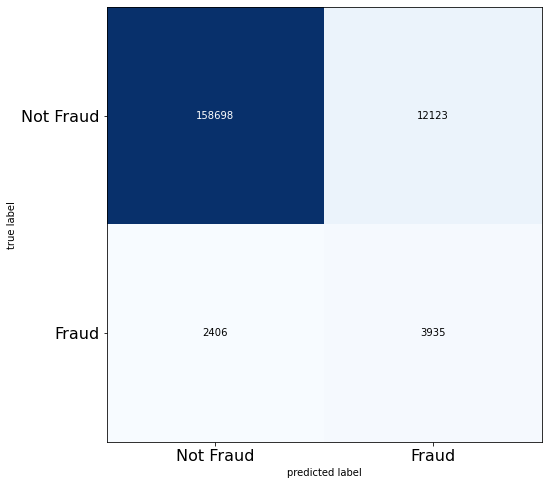

In [13]:
resample_model(LogisticRegression())

[[168327   2494]
 [  2478   3863]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    170821
           1       0.61      0.61      0.61      6341

    accuracy                           0.97    177162
   macro avg       0.80      0.80      0.80    177162
weighted avg       0.97      0.97      0.97    177162



<Figure size 432x288 with 0 Axes>

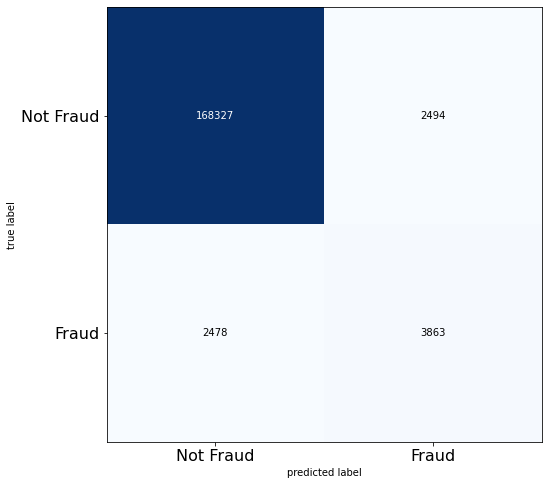

In [14]:
from sklearn.ensemble import RandomForestClassifier
resample_model(RandomForestClassifier())

[[168270   2551]
 [  2278   4063]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    170821
           1       0.61      0.64      0.63      6341

    accuracy                           0.97    177162
   macro avg       0.80      0.81      0.81    177162
weighted avg       0.97      0.97      0.97    177162



<Figure size 432x288 with 0 Axes>

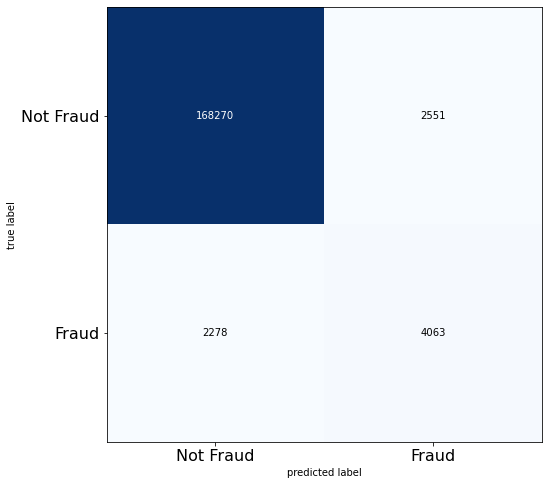

In [15]:
from xgboost import XGBClassifier
resample_model(XGBClassifier())

In [40]:
param={"min_child_weight"    : [1, 5] ,
 "max_depth"        : [ 3, 6, 9]}

In [41]:
model=XGBClassifier()
model_param = GridSearchCV(estimator=model, param_grid=param)
ml_clf=model_param.fit(X_train_new, y_train_new)
print(ml_clf.best_params_)

{'max_depth': 9, 'min_child_weight': 1}


[[168368   2453]
 [  1875   4466]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    170821
           1       0.65      0.70      0.67      6341

    accuracy                           0.98    177162
   macro avg       0.82      0.84      0.83    177162
weighted avg       0.98      0.98      0.98    177162



<Figure size 432x288 with 0 Axes>

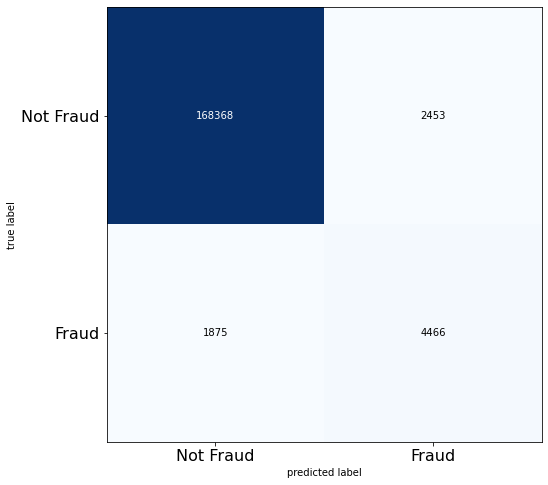

In [42]:
best_model = ml_clf.best_estimator_
y_pred = best_model.predict(X_test)
# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
cm  = confusion_matrix(y_test, y_pred)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(2), ['Not Fraud', 'Fraud'], fontsize=16)
plt.yticks(range(2), ['Not Fraud', 'Fraud'], fontsize=16)
plt.show()